# Galton Data Analysis

## Standard Imports

In [1]:
# For creating dataframe
import pandas as pd
import numpy as np

#For visualizing null values
# import missingno as msno

# For Data-Visualization
import matplotlib.pyplot as plt #for creating visualizations
import seaborn as sns
plt.rcParams["figure.figsize"] = "25,10"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16

# Importing Statsmodel
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import scipy

# Ignoring Warnings
import warnings 
warnings.filterwarnings("ignore")

## Loading the Data

In [2]:
data = pd.read_csv("/home/ubuntu/100datasets/warm-up/galton/galton-families.csv")

data.head()

,Unnamed: 0,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,001,78.5,67.0,75.43,4,1,male,73.2
1,2,001,78.5,67.0,75.43,4,2,female,69.2
2,3,001,78.5,67.0,75.43,4,3,female,69.0
3,4,001,78.5,67.0,75.43,4,4,female,69.0
4,5,002,75.5,66.5,73.66,4,1,male,73.5


In [1]:
data.describe(include = "all").transpose()

NameError: name 'data' is not defined

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 9 columns):
Unnamed: 0         934 non-null int64
family             934 non-null object
father             934 non-null float64
mother             934 non-null float64
midparentHeight    934 non-null float64
children           934 non-null int64
childNum           934 non-null int64
gender             934 non-null object
childHeight        934 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 65.8+ KB


In [5]:
data.drop(["Unnamed: 0", "family", "childNum"], axis = 1, inplace=True)

In [6]:
data.isna().sum()

father             0
mother             0
midparentHeight    0
children           0
gender             0
childHeight        0
dtype: int64

In [7]:
#Creating a mapper to change the column_type

typeMapper_default = {
    
    "gender" : "category"
}

data = data.astype(typeMapper_default)
data.reset_index(drop=True, inplace=True)

## Exploratory Data Analysis

### Nullity Analysis

In [8]:
# msno.matrix(data);

### Univariate Analysis

#### Real-valued Features

##### Father's Height

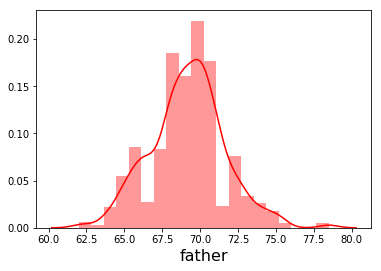

In [9]:
sns.distplot(data["father"], color="red", bins=20);

##### Mother's Height

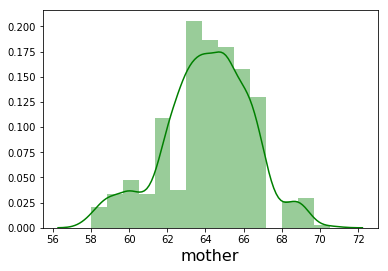

In [10]:
sns.distplot(data["mother"], color="green", bins= 15)

##### MidParent height

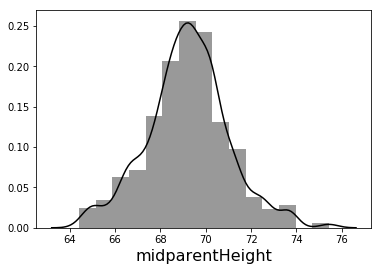

In [11]:
sns.distplot(data["midparentHeight"], color="black", bins= 15);

##### Child height

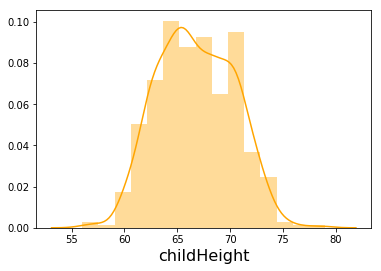

In [12]:
sns.distplot(data["childHeight"], color="orange", bins= 15);

##### Number of Children

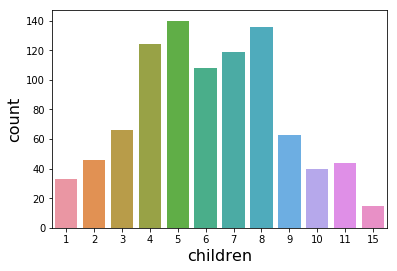

In [13]:
sns.countplot(data["children"]);

#### Categorical Variables

##### Gender

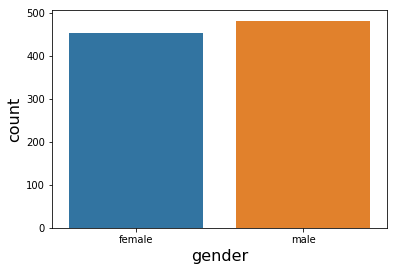

In [14]:
sns.countplot(data["gender"]);

### Bivariate Analysis

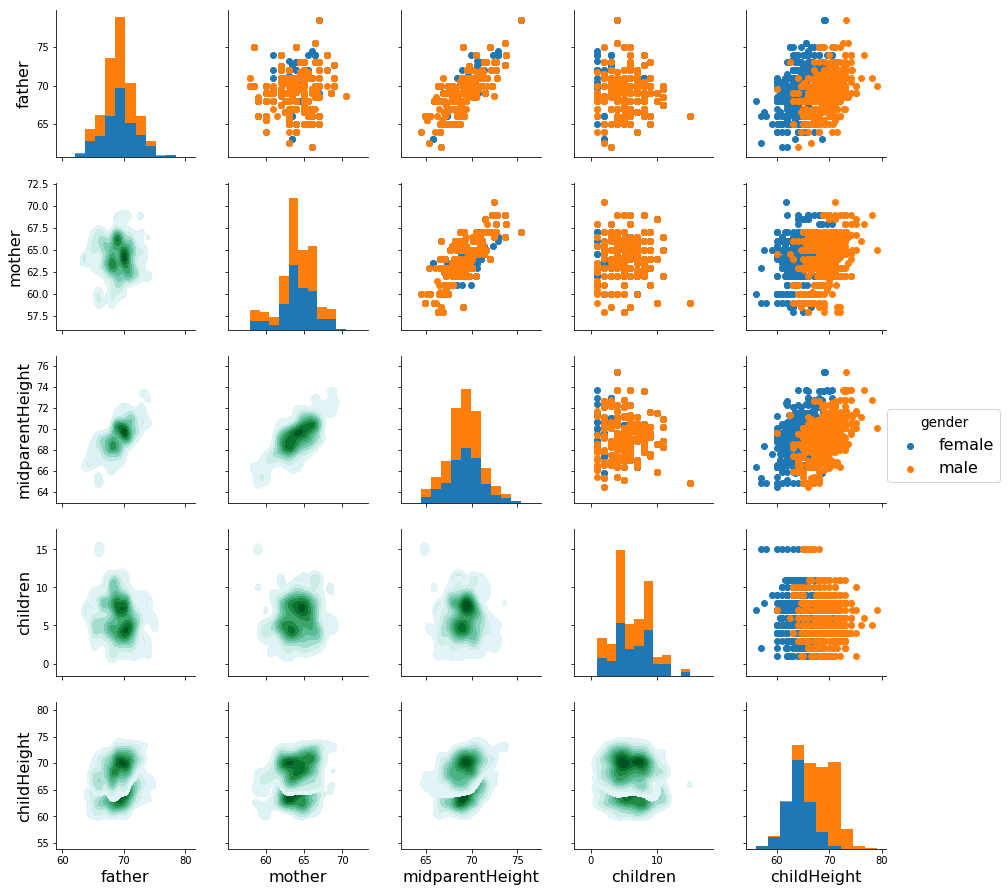

In [15]:
g = sns.PairGrid(data, hue = "gender")
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, shade = True, shade_lowest = False)
g = g.map_diag(plt.hist)
g = g.add_legend()

From the above pair plot, we can infer that both father and mother's height is positively correlated with the midParent height. Also, as the child's height increases, the chances of the child being a male is greater.

### Correlation Matrix

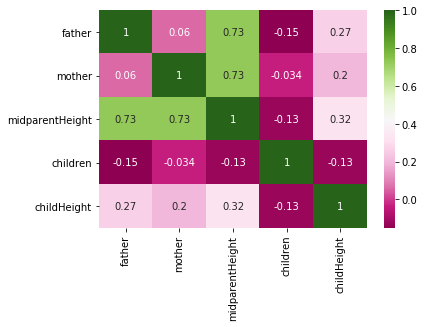

In [16]:
sns.heatmap(data.corr(), cmap="PiYG", annot=True);

In [17]:
mapping = {'male': 0, 'female': 1}
data = data.replace({'gender': mapping})
data.head()

,father,mother,midparentHeight,children,gender,childHeight
0,78.5,67.0,75.43,4,0,73.2
1,78.5,67.0,75.43,4,1,69.2
2,78.5,67.0,75.43,4,1,69.0
3,78.5,67.0,75.43,4,1,69.0
4,75.5,66.5,73.66,4,0,73.5


## Regression Models

### Liner Regression

#### Using only Father as a predictor

In [18]:
X = data["father"]
y = data["childHeight"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            childHeight   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.172e+05
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        04:11:31   Log-Likelihood:                -1925.6
No. Observations:                 700   AIC:                             3853.
Df Residuals:                     699   BIC:                             3858.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
father         0.9643      0.002    466.018      0.000       0.960       0.968
==============================================================================
Omnibus:                       13.010   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                7.511
Skew:                           0.010   Prob(JB):                       0.0234
Kurtosis:                       2.493   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
scipy.stats.pearsonr(y_test, predictions)

(0.3167488951178835, 7.522775896239882e-07)

#### Using only Mother as a predictor

In [20]:
X = data["mother"]
y = data["childHeight"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            childHeight   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.992e+05
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        04:11:31   Log-Likelihood:                -1955.8
No. Observations:                 700   AIC:                             3914.
Df Residuals:                     699   BIC:                             3918.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mother         1.0412      0.002    446.267      0.000       1.037       1.046
==============================================================================
Omnibus:                        4.825   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                3.608
Skew:                           0.016   Prob(JB):                        0.165
Kurtosis:                       2.650   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
scipy.stats.pearsonr(y_test, predictions)

(0.2596751610086477, 5.815523036955972e-05)

#### Using Father and Mother as a predictor

In [22]:
X = data[["father", "mother"]]
y = data["childHeight"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            childHeight   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.276e+05
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        04:11:31   Log-Likelihood:                -1868.8
No. Observations:                 700   AIC:                             3742.
Df Residuals:                     698   BIC:                             3751.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
father         0.5390      0.038     14.039      0.000       0.464       0.614
mother         0.4599      0.041     11.094      0.000       0.379       0.541
==============================================================================
Omnibus:                       33.277   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.116
Skew:                           0.049   Prob(JB):                     0.000860
Kurtosis:                       2.311   Cond. No.                         40.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
scipy.stats.pearsonr(y_test, predictions)

(0.3816989708213438, 1.5627295668377228e-09)

#### Liner Regression using all the predictors

In [24]:
X = data[["father",
          "mother",
          "midparentHeight",
          "children",
          "gender"]]

y = data["childHeight"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Note the difference in argument order
model = sm.OLS(y.astype(float), X.astype(float)).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            childHeight   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.081e+05
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        04:11:31   Log-Likelihood:                -2075.5
No. Observations:                 934   AIC:                             4159.
Df Residuals:                     930   BIC:                             4178.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
father              0.3749      0.022     16.881      0.000       0.331       0.418
mother              0.2995      0.023     13.103      0.000       0.255       0.344
midparentHeight     0.3492      0.002    222.868      0.000       0.346       0.352
children           -0.0058      0.027     -0.216      0.829      -0.058       0.047
gender             -5.2232      0.147    -35.561      0.000      -5.511      -4.935
==============================================================================
Omnibus:                        9.526   Durbin-Watson:                   1.457
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               12.921
Skew:                          -0.093   Prob(JB):                      0.00156
Kurtosis:                       3.545   Cond. No.                     6.53e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.01e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
scipy.stats.pearsonr(y_test, predictions)

(0.8011227003347874, 1.2385310596827774e-53)

### Standardizing the Data

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_standard_scaled = pd.DataFrame(scaler.fit_transform(X), columns = data.columns.values.tolist()[1:6])

X_train, X_test, y_train, y_test = train_test_split(X_standard_scaled, y, random_state=42)

### Random Forest Regressor

In [28]:
# Importing the random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score

# Evaluating model's area under curve ROC
from sklearn.metrics import r2_score, accuracy_score

In [29]:
rf = RandomForestRegressor()

In [30]:
rf.fit(X_train, y_train)

print(rf.score(X_test, y_test))

predictions = rf.predict(X_test)

0.5756690305520269


In [31]:
scipy.stats.pearsonr(y_test, predictions)

(0.7743427065787533, 5.2124548411912596e-48)

### Feature Important based on Random Forest Regressor

In [32]:
feature_importances = pd.DataFrame(rf.feature_importances_ ,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
gender,0.589425
midparentHeight,0.211675
children,0.082890
father,0.059863
mother,0.056148


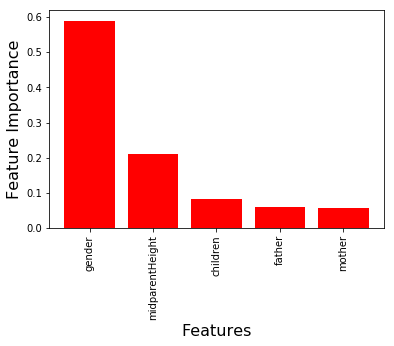

In [33]:
plt.bar(feature_importances.index, feature_importances.importance, color = "red");
plt.xlabel("Features");
plt.xticks(rotation=90);
plt.ylabel("Feature Importance");

### Deep Neural Network


In [34]:
# Keras and TensorFlow imports for Deep Learning
import keras
import tensorflow as tf

# Using keras with a Scikit-learn wrapper
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

# for defining the Neural-net
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam

Using TensorFlow backend.


In [35]:
def reg_model(learn_rate = 0.01):
    network = keras.models.Sequential()
    layer_1 = Dense(512, input_shape = (X_train.shape[1],), activation="relu")
    layer_2 = Dense(512, activation="tanh")
    layer_3 = Dense(512, activation="tanh")
    layer_4 = Dense(1)
    network.add(layer_1)
    network.add(Dropout(0.2))
    network.add(layer_2)
    network.add(Dropout(0.2))
    network.add(layer_3)
    network.add(Dropout(0.2))
    network.add(layer_4)
    network.compile(loss = "mean_squared_error",
                    optimizer = "adam",
                    metrics = ["mse"])
    return network

In [36]:
epochs = 500
batch_size = 32
mlpModel = KerasRegressor(reg_model, epochs=epochs, batch_size=batch_size, verbose=1)
mlpModel.fit(X_train, y_train)
y_hat = mlpModel.predict(X_test)
rsquared  = r2_score(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
print(f"Model coefficient of determination, R^2={rsquared}")
print(f"MSE: {mse}")

Epoch 1/500
700/700 [==============================] - 1s 1ms/step - loss: 2156.0672 - mean_squared_error: 2156.0672
Epoch 2/500
700/700 [==============================] - 0s 396us/step - loss: 623.5499 - mean_squared_error: 623.5499
Epoch 3/500
700/700 [==============================] - 0s 484us/step - loss: 233.1840 - mean_squared_error: 233.1840
Epoch 4/500
700/700 [==============================] - 1s 812us/step - loss: 77.1624 - mean_squared_error: 77.1624
Epoch 5/500
700/700 [==============================] - 0s 504us/step - loss: 28.8890 - mean_squared_error: 28.8890
Epoch 6/500
700/700 [==============================] - 0s 422us/step - loss: 17.3915 - mean_squared_error: 17.3915
Epoch 7/500
700/700 [==============================] - 0s 349us/step - loss: 14.7472 - mean_squared_error: 14.7472
Epoch 8/500
700/700 [==============================] - 0s 410us/step - loss: 15.6345 - mean_squared_error: 15.6345
Epoch 9/500
700/700 [==============================] - 0s 377us/step - los

Epoch 142/500
700/700 [==============================] - 0s 466us/step - loss: 7.0303 - mean_squared_error: 7.0303
Epoch 143/500
700/700 [==============================] - 0s 466us/step - loss: 7.2942 - mean_squared_error: 7.2942
Epoch 144/500
700/700 [==============================] - 0s 459us/step - loss: 7.6927 - mean_squared_error: 7.6927
Epoch 145/500
700/700 [==============================] - 1s 717us/step - loss: 8.2249 - mean_squared_error: 8.2249
Epoch 146/500
700/700 [==============================] - 0s 553us/step - loss: 7.5810 - mean_squared_error: 7.5810
Epoch 147/500
700/700 [==============================] - 0s 401us/step - loss: 7.3387 - mean_squared_error: 7.3387
Epoch 148/500
700/700 [==============================] - 0s 390us/step - loss: 6.5006 - mean_squared_error: 6.5006
Epoch 149/500
700/700 [==============================] - 0s 396us/step - loss: 7.4298 - mean_squared_error: 7.4298
Epoch 150/500
700/700 [==============================] - 0s 500us/step - loss: 7

700/700 [==============================] - 0s 402us/step - loss: 6.3997 - mean_squared_error: 6.3997
Epoch 285/500
700/700 [==============================] - 0s 370us/step - loss: 6.7104 - mean_squared_error: 6.7104
Epoch 286/500
700/700 [==============================] - 0s 328us/step - loss: 7.1662 - mean_squared_error: 7.1662
Epoch 287/500
700/700 [==============================] - 0s 392us/step - loss: 7.1021 - mean_squared_error: 7.1021
Epoch 288/500
700/700 [==============================] - 0s 408us/step - loss: 7.0838 - mean_squared_error: 7.0838
Epoch 289/500
700/700 [==============================] - 0s 594us/step - loss: 7.1002 - mean_squared_error: 7.1002
Epoch 290/500
700/700 [==============================] - 0s 355us/step - loss: 7.0241 - mean_squared_error: 7.0241
Epoch 291/500
700/700 [==============================] - 0s 383us/step - loss: 6.6921 - mean_squared_error: 6.6921
Epoch 292/500
700/700 [==============================] - 0s 360us/step - loss: 6.7718 - mean_s

700/700 [==============================] - 0s 385us/step - loss: 6.8697 - mean_squared_error: 6.8697
Epoch 427/500
700/700 [==============================] - 0s 395us/step - loss: 6.7755 - mean_squared_error: 6.7755
Epoch 428/500
700/700 [==============================] - 0s 365us/step - loss: 6.5049 - mean_squared_error: 6.5049
Epoch 429/500
700/700 [==============================] - 0s 390us/step - loss: 6.2045 - mean_squared_error: 6.2045
Epoch 430/500
700/700 [==============================] - 0s 678us/step - loss: 6.4934 - mean_squared_error: 6.4934
Epoch 431/500
700/700 [==============================] - 0s 394us/step - loss: 6.0898 - mean_squared_error: 6.0898
Epoch 432/500
700/700 [==============================] - 0s 376us/step - loss: 5.9939 - mean_squared_error: 5.9939
Epoch 433/500
700/700 [==============================] - 0s 276us/step - loss: 6.3114 - mean_squared_error: 6.3114
Epoch 434/500
700/700 [==============================] - 0s 268us/step - loss: 6.5721 - mean_s

In [37]:
scipy.stats.pearsonr(y_test, y_hat)

(0.77647977357235, 1.9821071495085906e-48)

### Kernel Principal Component Analysis

In [38]:
from sklearn.decomposition import PCA, KernelPCA

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X_standard_scaled)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA(n_components=5)

X_pca_5 = pca.fit_transform(X_back)

principal_X_pca_5 = pd.DataFrame(data = X_pca_5, columns=['principal component 1', 
                                                          'principal component 2',
                                                          'principal component 3', 
                                                          'principal component 4',
                                                          'principal component 5'])

### Linear Regression with 3 principal components as predictors


In [39]:
X = principal_X_pca_5

y = data["childHeight"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2_score(y_test, y_hat)

0.6348494137083647

In [40]:
scipy.stats.pearsonr(y_test, y_hat)

(0.7978635882927989, 6.641951866612043e-53)

### Scree Plot

In [41]:
explained_variance = np.var(X_pca_5, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

var1 = [np.cumsum(explained_variance_ratio)]
var1_new= var1[0].tolist()

N = [1,2,3,4,5]

PCA_table = pd.DataFrame(np.column_stack([N,var1_new]),columns = ['N', 'Cumulative_Variance'])

PCA_table

,N,Cumulative_Variance
0,1.0,0.417625
1,2.0,0.641970
2,3.0,0.834044
3,4.0,1.000000
4,5.0,1.000000


### Scree Plot

Text(0,0.5,'Cumulative Proportion of Variance Explained')

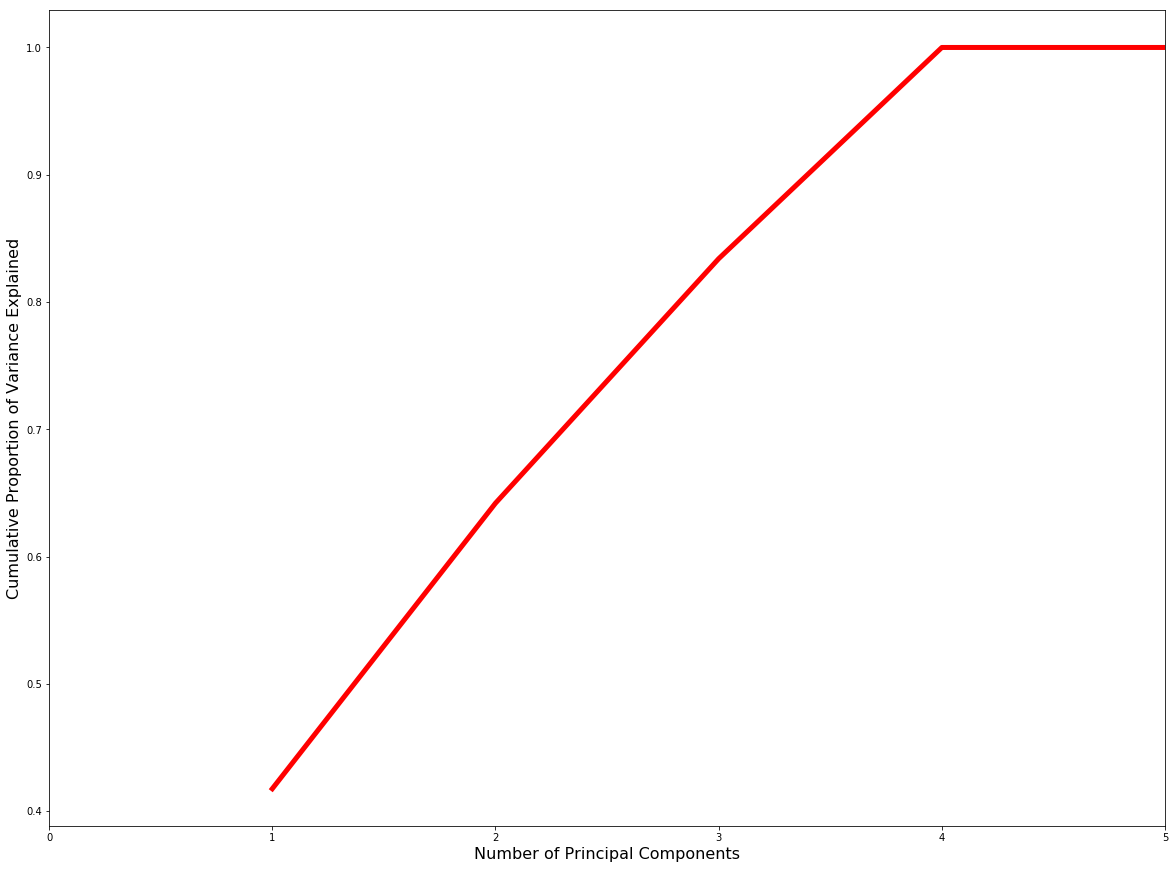

In [42]:
plt.rcParams["figure.figsize"] = "20,15"
plt.plot(PCA_table.N, PCA_table.Cumulative_Variance , linewidth = 5, c = "red")

plt.xlabel("Number of Principal Components")
plt.xlim(0,5)
plt.ylabel("Cumulative Proportion of Variance Explained")

### K-PCA with 3 Principal Components 

In [43]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X_standard_scaled)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA(n_components=3)

X_pca_3 = pca.fit_transform(X_back)

In [44]:
explained_variance = np.var(X_pca_3, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

explained_variance_ratio

np.cumsum(explained_variance_ratio)

array([0.50072275, 0.76970788, 1.        ])

In [45]:
principal_X_pca_3 = pd.DataFrame(data=X_pca_3, columns=['principal component 1', 
                                                        'principal component 2',
                                                        'principal component 3'])

<function matplotlib.pyplot.show(*args, **kw)>

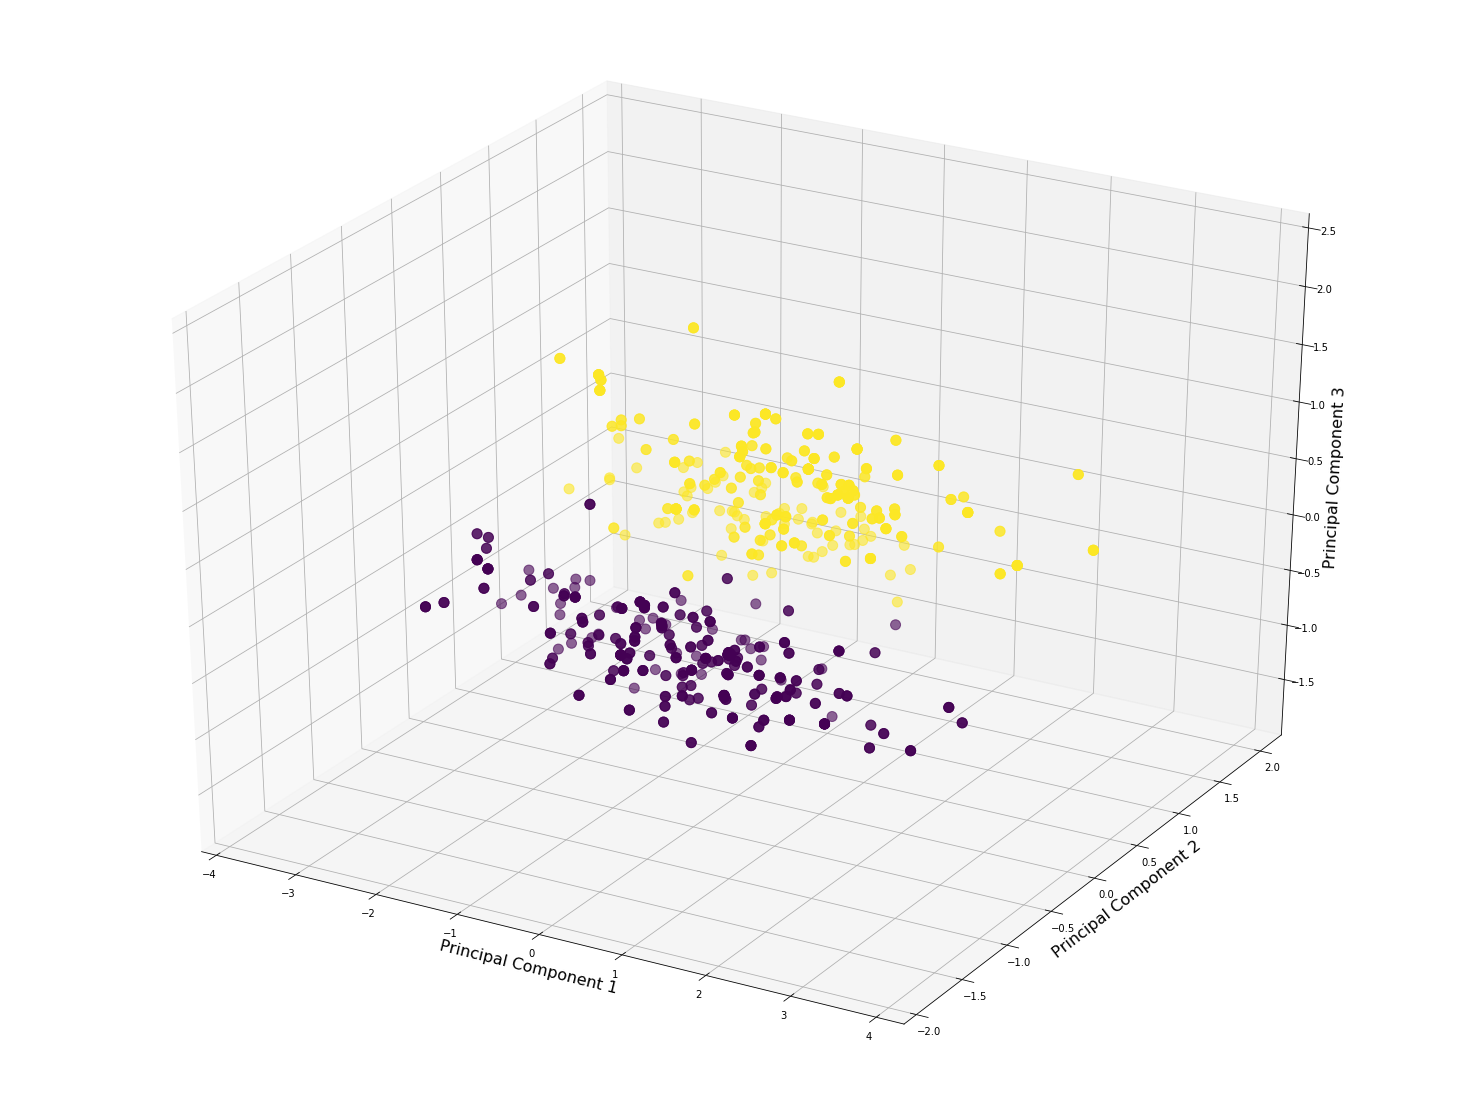

In [46]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = "20,15"

fig = plt.figure()
axis = Axes3D(fig)

axis.scatter(principal_X_pca_3.iloc[:,0],
             principal_X_pca_3.iloc[:,1],
             principal_X_pca_3.iloc[:,2], c = data.gender, s = 100, alpha=0.6)

axis.set_xlabel("Principal Component 1")
axis.set_ylabel("Principal Component 2")
axis.set_zlabel("Principal Component 3")
plt.show